# OBJECTIVE 
 1. <b> APPLYING SVM  WITH AVG WORD2VEC VECTORIZATION

2. FINDING THE BEST HYPERPARAMETER USING GRIDSEARCHCV WITH TRAIN DATA AND CROSS-VALIDATION       DATA BY PLOTTING THE RESLUTS OF CROSS VALIDATION DATA UISNG HEATMAP
  
3. PLOTTING OF ROC CURVE TO CHECK FOR THE AUC_SCORE 
  
4. USING THE APROPRIATE VALUE OF HYPERPARAMETER ,TESTING 
    ACCURACY ON TEST DATA USING AUC_SCORE
  
5. PLOTTING THE CONFUSION MATRIX TO GET THE PRECISOIN ,RECALL
    VALUE WITH HELP OF HEATMAP
  
6. PRINTING THE TOP 30 MOST IMPORTANT FEATURES #

In [3]:
from sklearn.model_selection import train_test_split          #importing the necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import *
from sklearn import naive_bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
from sklearn import *
import warnings
warnings.filterwarnings("ignore")
from gensim.models import Word2Vec
from tqdm import tqdm

In [4]:
final_processed_data=pd.read_csv("C:/Users/Mayank/Desktop/final_new_data.csv")#loading the preprocessed data  with 100k points into dataframe 

In [5]:
# getting the counts of 0 and 1 in "SCORE" column to know whether it is unbalanced data or not
count_of_1=0
count_of_0=0
for i in final_processed_data['Score']:
   if i==1:
    count_of_1+=1
   else:
    count_of_0+=1
print(count_of_1)
print(count_of_0)
#it is an imbalanced dataset

88521
11479


In [6]:
#spliiting the data into train and test data
x_train,x_test,y_train,y_test=model_selection.train_test_split(final_processed_data['CleanedText'].values,final_processed_data['Score'].values,test_size=0.2,shuffle=False)

In [7]:
# Training my own Word2Vec model using your own text corpus
list_of_sent=[]
for sent in x_train:
 list_of_sent.append(sent.split())#splitting of sentences into words AND appending them to list
print(x_train[0])
print("*****************************************************************")
print(list_of_sent[0])
word_to_vector=Word2Vec(list_of_sent,min_count=5,size=50,workers=2)#constructing my our word to vector
w_t_c_words=list(word_to_vector.wv.vocab)
print("***********************************************************************")
print("sample words ", w_t_c_words[0:50])

witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg
*****************************************************************
['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'book', 'introduc', 'silli', 'classic', 'book', 'will', 'bet', 'son', 'still', 'abl', 'recit', 'memori', 'colleg']
***********************************************************************
sample words  ['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'india', 'droop', 'love', 'new', 'word', 'introduc', 'silli', 'classic', 'will', 'bet', 'still', 'abl', 'memori', 'colleg', 'rememb', 'see', 'show', 'air', 'televis', 'year', 'ago', 'child', 'sister', 'later', 'bought', 'd

In [8]:
###### NOW STARTING AVERAGE WORD TO VEC FOR TRAIN DATA#################################################################
train_sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent): # for each review/sentence
 sent_vec = np.zeros(50) # as word vectors are of zero length
 cnt_words =0; # num of words with a valid vector in the sentence/review
 for word in sent: # for each word in a review/sentence
   if word in w_t_c_words:
     vec = word_to_vector.wv[word]
     sent_vec += vec
     cnt_words += 1
 if cnt_words != 0:
  sent_vec /= cnt_words
 train_sent_vectors.append(sent_vec)
print(len(train_sent_vectors))
print(len(train_sent_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 80000/80000 [05:05<00:00, 261.94it/s]


80000
50


In [9]:
from sklearn.preprocessing import StandardScaler #standarizing the training  data  
x_train_data=StandardScaler( with_mean=False).fit_transform(train_sent_vectors)
print(x_train_data.shape)

(80000, 50)


In [10]:
list_of_sent=[]
for sent in x_test:
 list_of_sent.append(sent.split())#splitting of sentences into words AND appending them to list
print(x_test[0])
print("*****************************************************************")
print(list_of_sent[0])
print('*******************************************************************')


hard find item dont buy mani either came stale got way quick classic nonetheless
*****************************************************************
['hard', 'find', 'item', 'dont', 'buy', 'mani', 'either', 'came', 'stale', 'got', 'way', 'quick', 'classic', 'nonetheless']
*******************************************************************


In [11]:
###### NOW STARTING AVERAGE WORD TO VEC FOR TEST DATA#################################################################
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent): # for each review/sentence
 sent_vec = np.zeros(50) # as word vectors are of zero length
 cnt_words =0; # num of words with a valid vector in the sentence/review
 for word in sent: # for each word in a review/sentence
   if word in w_t_c_words:
     vec = word_to_vector.wv[word]
     sent_vec += vec
     cnt_words += 1
 if cnt_words != 0:
  sent_vec /= cnt_words
 sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [01:07<00:00, 297.36it/s]


20000
50


In [12]:
from sklearn.preprocessing import StandardScaler #standarizing the training  data  
x_test_data=StandardScaler( with_mean=False).fit_transform(sent_vectors)
print(x_test_data.shape)

(20000, 50)


In [14]:
#using time series split method for cross-validation score
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10) 
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
data=[10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4]#range of hyperparameter


sgd=SGDClassifier(loss='log',class_weight={1:0.5,0:0.5},n_jobs=-1)
tuned_para=[{'alpha':data,'penalty':['l1','l2']}] 


In [14]:
#applying the model of support vector machine and using gridsearchcv to find the best hyper parameter
%time
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(sgd, tuned_para, scoring = 'roc_auc', cv=tscv,n_jobs=-1)#building the gridsearchcv model
model.fit(x_train_data, y_train)#fiitting the training data

print('BEST ESTIMATORS FOR MODEL ARE ',model.best_estimator_)#printing the best_estimator
print('AUC_SCORE OF TEST DATA IS',model.score(x_test_data, y_test))


Wall time: 0 ns
BEST ESTIMATORS FOR MODEL ARE  SGDClassifier(alpha=0.01, average=False, class_weight={1: 0.5, 0: 0.5},
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
AUC_SCORE OF TEST DATA IS 0.883125713187


In [20]:
results=pd.DataFrame(model.cv_results_)# getting varoius cv_scores and train_scores various values of alpha given as parameter and storing it in a dataframe
results#printing the dataframe

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,param_penalty,params,rank_test_score,split0_test_score,split0_train_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.484598,0.020583,0.935504,0.940772,0.0001,l1,"{'alpha': 0.0001, 'penalty': 'l1'}",15,0.918272,0.919599,...,0.938173,0.948600,0.943045,0.947942,0.934180,0.940852,0.241396,0.007381,0.010482,0.008387
1,0.317703,0.043863,0.941739,0.944645,0.0001,l2,"{'alpha': 0.0001, 'penalty': 'l2'}",4,0.945841,0.943348,...,0.936114,0.944116,0.938180,0.946375,0.939033,0.947469,0.135422,0.013372,0.007863,0.005078
2,0.539336,0.042289,0.945506,0.947192,0.001,l1,"{'alpha': 0.001, 'penalty': 'l1'}",2,0.954624,0.947488,...,0.940521,0.945865,0.936364,0.943840,0.938022,0.943759,0.264162,0.016647,0.006158,0.002371
3,0.331282,0.021286,0.945987,0.949872,0.001,l2,"{'alpha': 0.001, 'penalty': 'l2'}",1,0.940098,0.944202,...,0.946895,0.951059,0.939938,0.948362,0.941203,0.948103,0.174670,0.007703,0.005028,0.002474
4,0.468636,0.036624,0.941242,0.941594,0.01,l1,"{'alpha': 0.01, 'penalty': 'l1'}",5,0.942793,0.936916,...,0.937696,0.942494,0.934584,0.941963,0.937231,0.941230,0.225318,0.016711,0.004465,0.001813
5,0.364310,0.030142,0.943711,0.945327,0.01,l2,"{'alpha': 0.01, 'penalty': 'l2'}",3,0.950499,0.949554,...,0.938441,0.943372,0.934791,0.942456,0.937048,0.942076,0.182155,0.013966,0.006123,0.002462
6,0.481707,0.032230,0.941242,0.941594,0.1,l1,"{'alpha': 0.1, 'penalty': 'l1'}",5,0.942793,0.936916,...,0.937696,0.942494,0.934584,0.941963,0.937231,0.941230,0.247690,0.015855,0.004465,0.001813
7,0.392222,0.036737,0.941242,0.941594,0.1,l2,"{'alpha': 0.1, 'penalty': 'l2'}",5,0.942793,0.936916,...,0.937696,0.942494,0.934584,0.941963,0.937231,0.941230,0.144095,0.019946,0.004465,0.001813
8,0.455280,0.032383,0.941242,0.941594,1,l1,"{'alpha': 1, 'penalty': 'l1'}",5,0.942793,0.936916,...,0.937696,0.942494,0.934584,0.941963,0.937231,0.941230,0.191078,0.027001,0.004465,0.001813
9,0.360499,0.028852,0.941242,0.941594,1,l2,"{'alpha': 1, 'penalty': 'l2'}",5,0.942793,0.936916,...,0.937696,0.942494,0.934584,0.941963,0.937231,0.941230,0.170778,0.014367,0.004465,0.001813


In [21]:
results['mean_test_score']=results['mean_test_score']*100
results['mean_test_score']

0     93.550441
1     94.173856
2     94.550553
3     94.598665
4     94.124239
5     94.371058
6     94.124239
7     94.124239
8     94.124239
9     94.124239
10    94.124239
11    94.124239
12    84.743398
13    86.846289
14    94.124239
15    94.124239
16    75.256239
17    94.124239
Name: mean_test_score, dtype: float64

In [22]:
results['mean_test_score']=100-results['mean_test_score']
results['mean_cv_error']=results['mean_test_score'].round(decimals=2)
results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,param_penalty,params,rank_test_score,split0_test_score,split0_train_score,...,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score,mean_cv_error
0,0.484598,0.020583,6.449559,0.940772,0.0001,l1,"{'alpha': 0.0001, 'penalty': 'l1'}",15,0.918272,0.919599,...,0.948600,0.943045,0.947942,0.934180,0.940852,0.241396,0.007381,0.010482,0.008387,6.45
1,0.317703,0.043863,5.826144,0.944645,0.0001,l2,"{'alpha': 0.0001, 'penalty': 'l2'}",4,0.945841,0.943348,...,0.944116,0.938180,0.946375,0.939033,0.947469,0.135422,0.013372,0.007863,0.005078,5.83
2,0.539336,0.042289,5.449447,0.947192,0.001,l1,"{'alpha': 0.001, 'penalty': 'l1'}",2,0.954624,0.947488,...,0.945865,0.936364,0.943840,0.938022,0.943759,0.264162,0.016647,0.006158,0.002371,5.45
3,0.331282,0.021286,5.401335,0.949872,0.001,l2,"{'alpha': 0.001, 'penalty': 'l2'}",1,0.940098,0.944202,...,0.951059,0.939938,0.948362,0.941203,0.948103,0.174670,0.007703,0.005028,0.002474,5.40
4,0.468636,0.036624,5.875761,0.941594,0.01,l1,"{'alpha': 0.01, 'penalty': 'l1'}",5,0.942793,0.936916,...,0.942494,0.934584,0.941963,0.937231,0.941230,0.225318,0.016711,0.004465,0.001813,5.88


# PLOTTING THE HEATMAP WITH  HYPERPARAMETERS FOR CV_ERROR SCORE 

In [23]:
test_score_heatmap=results.pivot(	'param_alpha'	,'param_penalty','mean_cv_error'	)

In [24]:
test_score_heatmap

param_penalty,l1,l2
param_alpha,,
0.0001,6.45,5.83
0.0010,5.45,5.40
0.0100,5.88,5.63
0.1000,5.88,5.88
1.0000,5.88,5.88
10.0000,5.88,5.88
100.0000,15.26,13.15
1000.0000,5.88,5.88
10000.0000,24.74,5.88


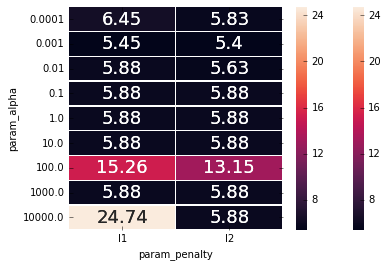

In [26]:
import seaborn as sns
sns.heatmap(test_score_heatmap,annot=True,annot_kws={"size": 18}, fmt='g',linewidths=.5)
import matplotlib.pylab as plt
plt.show()

# FROM HEATMAP THE BEST HYPERPARAMETER VALUES ARE FOUND TO BE PENALTY='L2' AND 'PARAM_ALPHA'=0.001

# BUILDING MODEL FOR SGD WITH CALIBRATED CLASSIFIER CV

In [16]:
sgd=SGDClassifier(loss='log',class_weight={1:0.5,0:0.5},n_jobs=-1,alpha=0.001,penalty='l2')
sgd.fit(x_train_data,y_train)

SGDClassifier(alpha=0.001, average=False, class_weight={1: 0.5, 0: 0.5},
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=-1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [17]:
from sklearn.metrics import brier_score_loss
prob_pos_clf = sgd.predict_proba(x_test_data)[:, 1]

# Gaussian Naive-Bayes with isotonic calibration
from sklearn.calibration import   CalibratedClassifierCV
clf_isotonic = CalibratedClassifierCV(sgd, cv=5, method='isotonic')
clf_isotonic.fit(x_train_data, y_train)
prob_pos_isotonic = clf_isotonic.predict_proba(x_test_data)[:, 1]

# Gaussian Naive-Bayes with sigmoid calibration
clf_sigmoid = CalibratedClassifierCV(sgd, cv=5, method='sigmoid')
clf_sigmoid.fit(x_train_data, y_train)
prob_pos_sigmoid = clf_sigmoid.predict_proba(x_test_data)[:, 1]

print("Brier scores: (the smaller the better)")

clf_score = brier_score_loss(y_test, prob_pos_clf)
print("No calibration: %1.3f" % clf_score)


clf_isotonic_score = brier_score_loss(y_test, prob_pos_isotonic)
print("With isotonic calibration: %1.3f" % clf_isotonic_score)

clf_sigmoid_score = brier_score_loss(y_test, prob_pos_sigmoid)
print("With sigmoid calibration: %1.3f" % clf_sigmoid_score)

Brier scores: (the smaller the better)
No calibration: 0.077
With isotonic calibration: 0.077
With sigmoid calibration: 0.077


# ISOTONIC CALIBRATION IS HAVING BEST VALUE  FOR CALIBRATED CLASSIFIER CV

 # PLOTTING THE ROC CURVE FOR TRAIN_DATA

In [18]:
clf_isotonic = CalibratedClassifierCV(sgd, cv=5, method='isotonic')
clf_isotonic.fit(x_train_data, y_train)
train_prob_pos_isotonic = clf_isotonic.predict_proba(x_train_data)[:, 1]

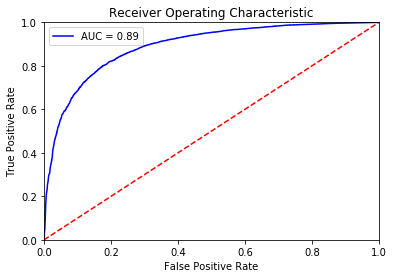

In [19]:
fpr, tpr, threshold = metrics.roc_curve(y_train, train_prob_pos_isotonic)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

 # PLOTTING THE ROC CURVE FOR TEST_DATA

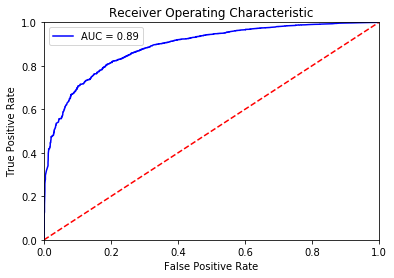

In [20]:
test_prob_pos_isotonic = clf_isotonic.predict_proba(x_test_data)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, test_prob_pos_isotonic)
roc_auc = metrics.auc(fpr, tpr)

# 
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
print("FROM ABOVE PLOT,AUC_SCORE IS FOUND AS ",roc_auc*100)

FROM ABOVE PLOT,AUC_SCORE IS FOUND AS  88.9106477257


 # USING BEST HYPERPARAMETER VALUE ON TEST DATA AND PLOTTING THE CONFUSION MATRIX WITH HEATMAP

Accuracy on test set: 89.405%
Precision on test set: 0.909
Recall on test set: 0.976
F1-Score on test set: 0.941
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



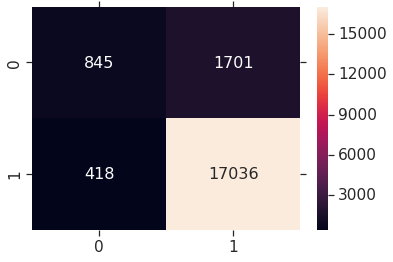

In [34]:
#Testing Accuracy on Test data  
import seaborn as sns #importing seaborn as sns
from sklearn.metrics import *#importing varoius metrics from sklearn
y_pred=clf_isotonic.predict(x_test_data)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))#printing accuracy
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))#printing precision score
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred))) #printing recall
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred))) 
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n") 
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2)) #generating the heatmap for confusion matrix
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
import matplotlib.pylab as plt
plt.show()

# RBF KERNEL WITH AVG WORD2VEC VECTORIZATION

# OBJECTIVE 
 1. <b> APPLYING SVM WITH RBF KERNEL   WITH AVG WORD2VEC VECTORIZATION

2. FINDING THE BEST HYPERPARAMETER USING GRIDSEARCHCV WITH TRAIN DATA AND CROSS-VALIDATION       DATA BY PLOTTING THE RESLUTS OF CROSS VALIDATION DATA UISNG HEATMAP
  
3. PLOTTING OF ROC CURVE TO CHECK FOR THE AUC_SCORE 
  
4. USING THE APROPRIATE VALUE OF HYPERPARAMETER ,TESTING 
    ACCURACY ON TEST DATA USING F1-SCORE
  
5. PLOTTING THE CONFUSION MATRIX TO GET THE PRECISOIN ,RECALL
    VALUE WITH HELP OF HEATMAP
  

##  RBF KERNEL IS COMPUTATIONALLY EXPENSIVE SO USING FIRST 30K POINTS ONLY

In [3]:

final_data=pd.read_csv('final_data.csv',encoding='latin-1')# IMPORT THE DATA FILE
final_data.head()


,Unnamed: 0,Score,CleanedText
0,0,1,realli like emerald nut buy smoke almond cashe...
1,1,1,crispi chewi intens flavor wow great ive love ...
2,2,1,great product fresh tast school teacher use po...
3,3,1,purchas along espresso ive mix two equal amoun...
4,4,1,yummi stuff surpris quick cook like mccann buy...


In [4]:
final_data.shape#PRINTING THE SHAPE OF FILE

(30000, 3)

In [5]:
#spliiting the data into train and test data
x_train,x_test,y_train,y_test=model_selection.train_test_split(final_data['CleanedText'].values,final_data['Score'].values,test_size=0.30,shuffle=False)

In [6]:
# Training my own Word2Vec model using your own text corpus
list_of_sent=[]
for sent in x_train:
 list_of_sent.append(sent.split())#splitting of sentences into words AND appending them to list
print(x_train[0])
print("*****************************************************************")
print(list_of_sent[0])
word_to_vector=Word2Vec(list_of_sent,min_count=5,size=50,workers=2)#constructing my our word to vector
w_t_c_words=list(word_to_vector.wv.vocab)
print("***********************************************************************")

realli like emerald nut buy smoke almond cashew cocoa roast almond preserv much like emerald nut fresh much oil high qualiti snack instead salti one sweet doesnt come sugar though sweeten light sucralos sweeten sold brand name splenda note product doesnt contain chocol though describ dark chocol flavor cocoa roast surfac nut almond coat chocol good part dont make mess theyr better choic someon tri avoid sweet sure bought expect get chocol disappoint like enough ill get especi need someth cut crave chocol candi enough chocol flavor one gram sugar per serv
*****************************************************************
['realli', 'like', 'emerald', 'nut', 'buy', 'smoke', 'almond', 'cashew', 'cocoa', 'roast', 'almond', 'preserv', 'much', 'like', 'emerald', 'nut', 'fresh', 'much', 'oil', 'high', 'qualiti', 'snack', 'instead', 'salti', 'one', 'sweet', 'doesnt', 'come', 'sugar', 'though', 'sweeten', 'light', 'sucralos', 'sweeten', 'sold', 'brand', 'name', 'splenda', 'note', 'product', 'doe

In [7]:
###### NOW STARTING AVERAGE WORD TO VEC FOR TRAIN DATA#################################################################
train_sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent): # for each review/sentence
 sent_vec = np.zeros(50) # as word vectors are of zero length
 cnt_words =0; # num of words with a valid vector in the sentence/review
 for word in sent: # for each word in a review/sentence
   if word in w_t_c_words:
     vec = word_to_vector.wv[word]
     sent_vec += vec
     cnt_words += 1
 if cnt_words != 0:
  sent_vec /= cnt_words
 train_sent_vectors.append(sent_vec)
print(len(train_sent_vectors))
print(len(train_sent_vectors[0]))

100%|██████████| 21000/21000 [01:14<00:00, 283.00it/s]

21000
50


In [9]:
from sklearn.preprocessing import StandardScaler #standarizing the training  data  
x_train_data=StandardScaler( with_mean=False).fit_transform(train_sent_vectors)
print(x_train_data.shape)

(21000, 50)


In [10]:
list_of_sent=[]
for sent in x_test:
 list_of_sent.append(sent.split())#splitting of sentences into words AND appending them to list
print(x_test[0])
print("*****************************************************************")
print(list_of_sent[0])
print('*******************************************************************')


big famili hit bigger fruit tast found sweet make great snack even dessert
*****************************************************************
['big', 'famili', 'hit', 'bigger', 'fruit', 'tast', 'found', 'sweet', 'make', 'great', 'snack', 'even', 'dessert']
*******************************************************************


In [11]:
###### NOW STARTING AVERAGE WORD TO VEC FOR TEST DATA#################################################################
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent): # for each review/sentence
 sent_vec = np.zeros(50) # as word vectors are of zero length
 cnt_words =0; # num of words with a valid vector in the sentence/review
 for word in sent: # for each word in a review/sentence
   if word in w_t_c_words:
     vec = word_to_vector.wv[word]
     sent_vec += vec
     cnt_words += 1
 if cnt_words != 0:
  sent_vec /= cnt_words
 sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|██████████| 9000/9000 [00:31<00:00, 282.94it/s]

9000
50


In [12]:
from sklearn.preprocessing import StandardScaler #standarizing the training  data  
x_test_data=StandardScaler( with_mean=False).fit_transform(sent_vectors)
print(x_test_data.shape)

(9000, 50)


In [22]:
#using time series split method for cross-validation score
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=2) 
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
c_values=[0.001,0.01,0.1,1,5,10,100]#range of hyperparameter
gamma_values=[0.001,0.01,0.1,1,5,10,100]#range of hyperparameter

svc=SVC(class_weight='balanced',probability=True)
tuned_para=[{'C':c_values,'gamma':gamma_values}] 

In [14]:
#applying the model of support vector machine and using gridsearchcv to find the best hyper parameter
%time
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(svc, tuned_para, scoring = 'f1', cv=tscv,n_jobs=-1)#building the gridsearchcv model




CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


In [15]:
%%time
model.fit(x_train_data, y_train)#fiitting the training data

CPU times: user 13min 13s, sys: 918 ms, total: 13min 14s
Wall time: 1h 11min 49s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=2),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [16]:
model.best_estimator_#checking the best estimator

SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# BUILDING THE HEATMAP FOR CV_ERROR SCORE FOR HYPERPARAMETERS

In [17]:
results=pd.DataFrame(model.cv_results_)# getting varoius cv_scores and train_scores various values of alpha given as parameter and storing it in a dataframe
results#printing the dataframe

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,197.648184,10.131180,0.802086,0.798360,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",39,0.800754,0.797561,0.803419,0.799159,146.399794,2.577399,0.001332,0.000799
1,165.438953,9.544565,0.811272,0.807801,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",38,0.800754,0.797561,0.821790,0.818041,119.256087,3.478942,0.010518,0.010240
2,237.728254,10.377414,0.802086,0.798360,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",39,0.800754,0.797561,0.803419,0.799159,184.253983,2.728685,0.001332,0.000799
3,243.532411,9.945897,0.802086,0.798360,0.001,1,"{'C': 0.001, 'gamma': 1}",39,0.800754,0.797561,0.803419,0.799159,198.729659,3.892157,0.001332,0.000799
4,193.668029,9.947155,0.802086,0.798360,0.001,5,"{'C': 0.001, 'gamma': 5}",39,0.800754,0.797561,0.803419,0.799159,150.168631,3.546133,0.001332,0.000799
5,175.502086,9.581793,0.802086,0.798360,0.001,10,"{'C': 0.001, 'gamma': 10}",39,0.800754,0.797561,0.803419,0.799159,133.931696,3.417346,0.001332,0.000799
6,148.011728,7.960449,0.802086,0.798360,0.001,100,"{'C': 0.001, 'gamma': 100}",39,0.800754,0.797561,0.803419,0.799159,110.813864,2.866023,0.001332,0.000799
7,157.158270,8.891936,0.772807,0.768199,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",49,0.751002,0.750158,0.794611,0.786241,115.377498,2.853592,0.021805,0.018041
8,130.200086,7.456697,0.829821,0.824365,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",31,0.822664,0.821648,0.836977,0.827082,91.395528,2.131856,0.007157,0.002717
9,154.453660,9.169340,0.813678,0.808912,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",37,0.801578,0.798864,0.825777,0.818961,107.429629,3.050945,0.012099,0.010048


In [19]:
 
results['mean_test_score']=results['mean_test_score']*100#multiplying mean_test_score by 100
results['mean_test_score']
results['mean_test_score']=100-results['mean_test_score']#substracting from 100 to get a cv_error score
results['mean_cv_error']=results['mean_test_score'].round(decimals=2)# rounding cv_error score upto 2 decimal points
results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,std_fit_time,std_score_time,std_test_score,std_train_score,mean_cv_error
0,197.648184,10.131180,19.791369,0.798360,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",39,0.800754,0.797561,0.803419,0.799159,146.399794,2.577399,0.001332,0.000799,19.79
1,165.438953,9.544565,18.872808,0.807801,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",38,0.800754,0.797561,0.821790,0.818041,119.256087,3.478942,0.010518,0.010240,18.87
2,237.728254,10.377414,19.791369,0.798360,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",39,0.800754,0.797561,0.803419,0.799159,184.253983,2.728685,0.001332,0.000799,19.79
3,243.532411,9.945897,19.791369,0.798360,0.001,1,"{'C': 0.001, 'gamma': 1}",39,0.800754,0.797561,0.803419,0.799159,198.729659,3.892157,0.001332,0.000799,19.79
4,193.668029,9.947155,19.791369,0.798360,0.001,5,"{'C': 0.001, 'gamma': 5}",39,0.800754,0.797561,0.803419,0.799159,150.168631,3.546133,0.001332,0.000799,19.79


In [20]:
test_score_heatmap=results.pivot(	'param_C'	,'param_gamma','mean_cv_error'	)#converting  into pivot table

In [21]:
test_score_heatmap#printing the pivot table

param_gamma,0.001,0.01,0.1,1.0,5.0,10.0,100.0
param_C,,,,,,,
0.001,19.79,18.87,19.79,19.79,19.79,19.79,19.79
0.010,22.72,17.02,18.63,19.79,19.79,19.79,19.79
0.100,17.17,14.90,13.85,17.83,17.84,17.84,17.84
1.000,15.60,13.28,10.30,15.03,15.08,15.09,15.10
5.000,14.93,12.09,10.12,15.03,15.08,15.09,15.10
10.000,14.43,11.62,10.05,15.03,15.08,15.09,15.10
100.000,13.56,11.39,10.11,15.03,15.08,15.09,15.10


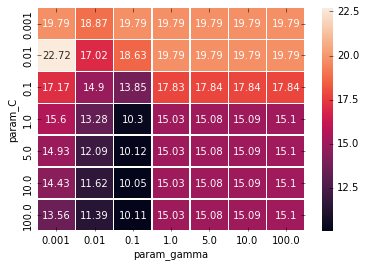

In [27]:
import seaborn as sns
sns.heatmap(test_score_heatmap,annot=True,annot_kws={"size": 10}, fmt='g',linewidths=.5)
import matplotlib.pylab as plt
plt.show()#printing the heatmap with cv_error 

# FROM HERE BEST HPYERPARAMETERS ARE GAMMA =0.1   AND  C=10

In [23]:
# building the model with value of hyperparameters values
svc=SVC(class_weight='balanced',probability=True,C=10,gamma=0.1)

# PLOTTING THE ROC CURVE FOR TRAIN_DATA

In [ ]:
#fitting the model 
svc.fit(x_train_data,y_train)
probs = svc.predict_proba(x_train_data)#predicting the model 
y_pred_train = probs[:,1]


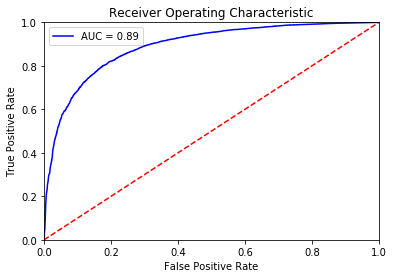

In [22]:
fpr, tpr, threshold = metrics.roc_curve(y_train, y_pred_train)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# PLOTTING THE ROC CURVE FOR TEST_DATA

In [ ]:
#fitting the model 
svc.fit(x_train_data,y_train)
probs = svc.predict_proba(x_test_data)#predicting the model 
y_pred = probs[:,1]


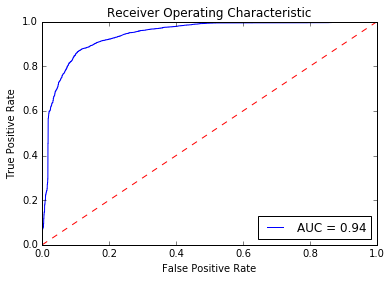

In [37]:
#plotting the curve for finding the auc_score 
fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr, tpr)
 
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [44]:
print("Best auc_score  from above curve is founs to be ",roc_auc*100)

Best auc_score  from above curve is founs to be  94.13072703895155


# USING BEST HYPERPARAMETER VALUE ON TEST DATA AND PLOTTING THE CONFUSION MATRIX WITH HEATMAP

Accuracy on test set: 88.000%
Precision on test set: 0.886
Recall on test set: 0.940
F1-Score on test set: 0.912
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



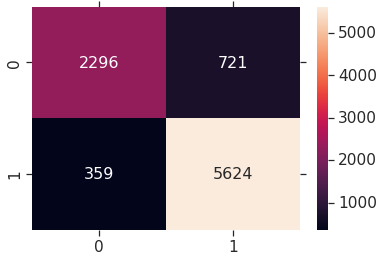

In [42]:
#Testing Accuracy on Test data  
import seaborn as sns #importing seaborn as sns
from sklearn.metrics import *#importing varoius metrics from sklearn
y_pred=svc.predict(x_test_data)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))#printing accuracy
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))#printing precision score
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred))) #printing recall
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred))) 
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n") 
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2)) #generating the heatmap for confusion matrix
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
import matplotlib.pylab as plt
plt.show()

# <i>AVG WORD2VEC VECTORIZATION WITH SUPPORT VECTOR MACHINE  WITH LINEAR KERNEL AND RBF KERNEL IS DONE<b>
 ********************************************************************************************************